### STL-IQR, Twitter-GESD, ARIMA

In [446]:
library(prophet)

ERROR: Error in library(prophet): there is no package called 'prophet'


In [2]:
install.packages("anomalize",  repos = "http://cran.us.r-project.org")
install.packages('tsoutliers',repos = "http://cran.us.r-project.org")
install.packages('fpp2', repos = "http://cran.us.r-project.org")
#install.packages("dplyr",  repos = "http://cran.us.r-project.org")   
#install.packages("tibbletime",  repos = "http://cran.us.r-project.org")
#install.packages("ggplot2")
#install.packages("tseries")
#install.packages("forecast")
#install.packages("zoo")
#install.packages("roll")

also installing the dependencies 'ini', 'desc', 'rprojroot', 'xopen', 'clisymbols', 'gh', 'quadprog', 'git2r', 'memoise', 'pkgbuild', 'pkgload', 'rcmdcheck', 'remotes', 'sessioninfo', 'usethis', 'fracdiff', 'lmtest', 'tseries', 'urca', 'RcppArmadillo', 'devtools', 'forecast', 'padr', 'timetk', 'sweep', 'tibbletime'



package 'ini' successfully unpacked and MD5 sums checked
package 'desc' successfully unpacked and MD5 sums checked
package 'rprojroot' successfully unpacked and MD5 sums checked
package 'xopen' successfully unpacked and MD5 sums checked
package 'clisymbols' successfully unpacked and MD5 sums checked
package 'gh' successfully unpacked and MD5 sums checked
package 'quadprog' successfully unpacked and MD5 sums checked
package 'git2r' successfully unpacked and MD5 sums checked
package 'memoise' successfully unpacked and MD5 sums checked
package 'pkgbuild' successfully unpacked and MD5 sums checked
package 'pkgload' successfully unpacked and MD5 sums checked
package 'rcmdcheck' successfully unpacked and MD5 sums checked
package 'remotes' successfully unpacked and MD5 sums checked
package 'sessioninfo' successfully unpacked and MD5 sums checked
package 'usethis' successfully unpacked and MD5 sums checked
package 'fracdiff' successfully unpacked and MD5 sums checked
package 'lmtest' successfu

also installing the dependencies 'fma', 'expsmooth'



package 'fma' successfully unpacked and MD5 sums checked
package 'expsmooth' successfully unpacked and MD5 sums checked
package 'fpp2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Xiaoxin.Xu\AppData\Local\Temp\RtmpKOR8Ix\downloaded_packages


In [1]:
library(ggplot2)
library(anomalize)
library(tibbletime)
library(dplyr)
library(tseries)
library(forecast)
library(zoo)
library(tsoutliers)
library(TTR)
#library(tidyverse)
library(fpp2) 

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'tibbletime'

The following object is masked from 'package:stats':

    filter


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: fma
Loading required package: expsmooth


In [3]:
pre <- function(name){
  df = read.csv(name)
  df$data <- as.Date(df$date, format="%Y-%m-%d")
  df = tbl_df(df)
  return(df)
}

In [4]:
d = pre('all.csv')

### stl and twitter

In [381]:
d$date = as.Date(d$date, format="%m/%d/%Y")

Converting from tbl_df to tbl_time.
Auto-index message: index = date
frequency = 7 days
trend = 7 days


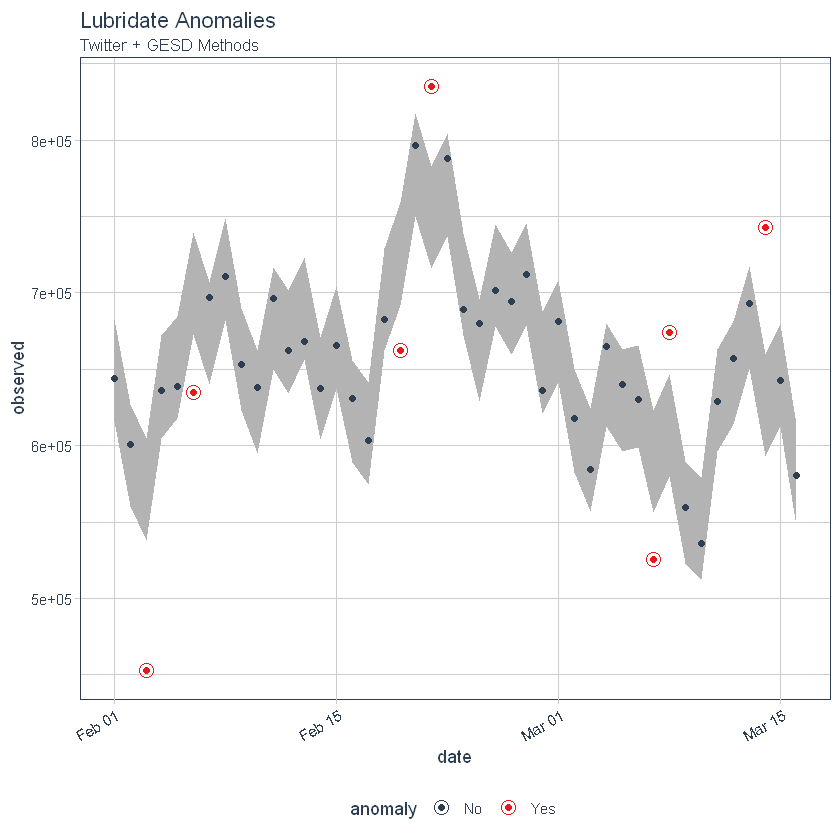

In [385]:
func2(head(d,44))

In [365]:
func1 <- function(df){
  df %>%
    # STL + IQR Anomaly Detection
    time_decompose(rate, method = "twitter", trend = "7 days") %>%
    anomalize(remainder, method = "iqr") %>%
    time_recompose() %>%
    # Anomaly Visualization
    plot_anomalies(time_recomposed = TRUE) +
    labs(title = "Tidyverse Anomalies", subtitle = "STL + IQR Methods")
}

func2 <- function(df){
  df %>%
    # Twitter + GESD
    time_decompose(visitors, method = "stl", trend = "7 days") %>%
    anomalize(remainder, method = "gesd") %>%
    time_recompose() %>%
    # Anomaly Visualziation
    plot_anomalies(time_recomposed = TRUE) +
    labs(title = "Lubridate Anomalies", subtitle = "Twitter + GESD Methods")
}

In [ ]:
new_data = c(644248,
 600854,
 452830,
 636388,
 638629,
 635154,
 696833,
 710880,
 653226,
 637810,
 696586,
 662052,
 668065,
 637245,
 665895,
 631231,
 603395,
 682920,
 662657,
 796812,
 835134,
 788164,
 689473,
 679961,
 701911,
 694324,
 712073,
 636347,
 681591,
 617902,
 609522.3,
 675150.8,
 672897.0,
 696801.7,
 701485.6,
 735225.0,
 679353.4,
 670973.7,
 736602.2,
 734348.4,
 758253.1,
 762937.0,
 796676.4,
 740804.8)

In [308]:
dnew = data.frame(new_data)

In [316]:
dnew$date = d$date[1:44]

In [317]:
d$date

[1] 2/1/2019  2/2/2019  2/3/2019  2/4/2019  2/5/2019  2/6/2019  2/7/2019 
 [8] 2/8/2019  2/9/2019  2/10/2019 2/11/2019 2/12/2019 2/13/2019 2/14/2019
[15] 2/15/2019 2/16/2019 2/17/2019 2/18/2019 2/19/2019 2/20/2019 2/21/2019
[22] 2/22/2019 2/23/2019 2/24/2019 2/25/2019 2/26/2019 2/27/2019 2/28/2019
[29] 3/1/2019  3/2/2019  3/3/2019  3/4/2019  3/5/2019  3/6/2019  3/7/2019 
[36] 3/8/2019  3/9/2019  3/10/2019 3/11/2019 3/12/2019 3/13/2019 3/14/2019
[43] 3/15/2019 3/16/2019 3/17/2019 3/18/2019 3/19/2019 3/20/2019 3/21/2019
[50] 3/22/2019 3/23/2019 3/24/2019 3/25/2019 3/26/2019 3/27/2019 3/28/2019
[57] 3/29/2019 3/30/2019 3/31/2019
59 Levels: 2/1/2019 2/10/2019 2/11/2019 2/12/2019 2/13/2019 ... 3/9/2019

In [318]:
dnew$date <- as.Date(dnew$date, format="%m/%d/%Y")
dnew = tbl_df(dnew)

Converting from tbl_df to tbl_time.
Auto-index message: index = date
frequency = 7 days
trend = 7 days


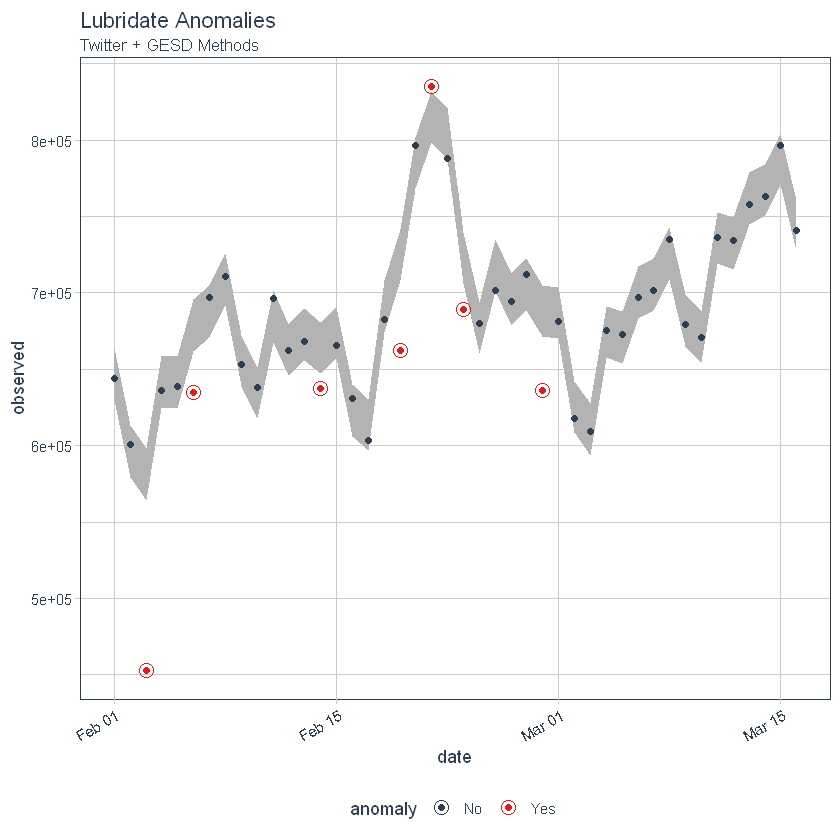

In [388]:
func2(dnew)

In [387]:
func2 <- function(df){
  df %>%
    # Twitter + GESD
    time_decompose(new_data, method = "stl", trend = "7 days") %>%
    anomalize(remainder, method = "gesd") %>%
    time_recompose() %>%
    # Anomaly Visualziation
    plot_anomalies(time_recomposed = TRUE) +
    labs(title = "Lubridate Anomalies", subtitle = "Twitter + GESD Methods")
}

In [219]:
##### use the one month to train
data = d$visitors
sample = data[1:28]

In [226]:
sample = data[1:28]

1.A. STL
The STL method uses the stl() function from the stats package. STL works very well in circumstances where a long term trend is present. The Loess algorithm typically does a very good job at detecting the trend. However, it circumstances when the seasonal component is more dominant than the trend, Twitter tends to perform better.

1.B. Twitter
The Twitter method is a similar decomposition method to that used in Twitter’s AnomalyDetection package. The Twitter method works identically to STL for removing the seasonal component. The main difference is in removing the trend, which is performed by removing the median of the data rather than fitting a smoother. The median works well when a long-term trend is less dominant that the short-term seasonal component. This is because the smoother tends to overfit the anomalies.

2.A. IQR
The IQR method is a similar method to that used in the forecast package for anomaly removal within the tsoutliers() function. It takes a distribution and uses the 25% and 75% inner quartile range to establish the distribution of the remainder. Limits are set by default to a factor of 3X above and below the inner quartile range, and any remainders beyond the limits are considered anomalies.

The alpha parameter adjusts the 3X factor. By default, alpha = 0.05 for consistency with the GESD method. An alpha = 0.025, results in a 6X factor, expanding the limits and making it more difficult for data to be an anomaly. Conversely, an alpha = 0.10 contracts the limits to a factor of 1.5X making it more easy for data to be an anomaly.

The IQR method does not depend on any loops and is therefore faster and more easily scaled than the GESD method. However, it may not be as accurate in detecting anomalies since the high leverage anomalies can skew the centerline (median) of the IQR.

2.B. GESD
The GESD method is used in Twitter’s AnomalyDetection package. It involves an iterative evaluation of the Generalized Extreme Studentized Deviate test, which progressively evaluates anomalies, removing the worst offenders and recalculating the test statistic and critical value. The critical values progressively contract as more high leverage points are removed.

The alpha parameter adjusts the width of the critical values. By default, alpha = 0.05.

The GESD method is iterative, and therefore more expensive that the IQR method. The main benefit is that GESD is less resistant to high leverage points since the distribution of the data is progressively analyzed as anomalies are removed.

We can see that the IQR limits don’t vary whereas the GESD limits get more stringent as anomalies are removed from the data. As a result, the GESD method tends to be more accurate in detecting anomalies at the expense of incurring more processing time for the looped anomaly removal. This expense is most noticeable with larger data sets (many observations or many time series).


Reference:https://business-science.github.io/anomalize/articles/anomalize_methods.html



In [354]:
t = head(d,44)

https://datascienceplus.com/time-series-analysis-using-arima-model-in-r/ 
check for stationary

### ARIMA

1.	LSTM works better if we are dealing with huge amount of data and enough training data is available, while ARIMA is better for smaller datasets
2.	ARIMA requires a series of parameters (p,q,d) which must be calculated based on data, while LSTM does not require setting such parameters. However, there are some hyperparameters we need to tune for LSTM.
3.	ARIMA could only perform well on stationary time series (where there is no seasonality, trend and etc.) and you need to take care of that if want to use ARIMA


In [10]:
func3 <- function(data){
    # check stationary
    index = 1:59
    ts = data
    kpss.test(ts)
    
    # fit
    fit <- arima(ts, c(1,1,0))
    tsdisplay(residuals(fit))
    

    fitted = fitted(fit)
    #error = abs(fitted-ts)
    #mean = rollmean(ts, 7, fill=NA, align='right')
    #std = rollapply(ts, 7, sd, fill=NA, align='right')
    #v = which(error > 1.5*std)
    #plot(fit$x, col=ifelse(index %in% v,'red','black'), type='o');  lines(fitted(fit),col="blue") 
    detect_outlier(data, fit)
    
    f = forecast(fit,7)
    plot(f)
    
}

In [67]:
res$outliers

type,ind,coefhat,tstat
AO,3,-121761.6,-3.598000
AO,35,-126259.6,-3.729575
TC,20,142848.3,3.748381


In [11]:
detect_outlier <- function(data, fit){
    res <- locate.outliers.oloop(data, fit, types = c("AO", "LS", "TC"))
    res$outliers
    v = as.vector(res$outliers$ind)
    index = 1:59
    plot(data, col=ifelse(index %in% v,'red','black'), type='o');  lines(fitted(fit),col="blue") 
}

### benchmarkM

In [129]:
data1 = c(644248. , 600854. , 452830. , 636388. , 638629. , 635154. ,
       696833. , 710880. , 653226. , 637810. , 696586. , 662052. ,
       668065. , 637245. , 665895. , 631231. , 603395. , 682920. ,
       662657. , 796812. , 835134. , 788164. , 689473. , 679961. ,
       701911. , 694324. , 712073. , 636347. , 681591. , 617902. ,
       584435. , 664686. , 639790. , 630434. , 525185. , 674127. ,
       559375. , 535700. , 629173. , 657024. , 693097. , 742669. ,
       642488. , 580696. , 571953. , 616042. , 609722. , 644274. ,
       653760. , 672620. , 590888. , 567274. , 638841.8, 631353.2,
       664535.4, 656833.8, 672732.9, 603716.9, 585876.2)

In [142]:
data = c( 5735.   ,  5154.   ,  3374.   ,  5633.   ,  5693.   ,  5445.   ,
        6312.   ,  6088.   ,  5653.   ,  5017.   ,  6118.   ,  6043.   ,
        5708.   ,  5130.   ,  5608.   ,  5145.   ,  4722.   ,  6217.   ,
        5807.   ,  8041.   ,  8312.   , 13084.   ,  6448.   ,  6259.   ,
        6673.   ,  6481.   ,  7928.   ,  6919.   ,  7786.   ,  6862.   ,
        6747.   ,  7609.   ,  7051.   ,  7331.   ,  5479.   ,  7006.   ,
        5877.   ,  5308.   ,  6393.   ,  6110.   ,  6563.   ,  6818.   ,
        6460.   ,  5713.   ,  5458.   ,  6132.   ,  6521.   ,  6366.   ,
        5783.   ,  6296.   ,  5298.   ,  4873.   ,  6064.68 ,  6067.862,
        6275.992,  6320.34 ,  6903.444,  5811.45 ,  5414.026)

In [157]:
data =  c(0.00890185, 0.00857779, 0.00745092, 0.00885152, 0.00891441,
       0.00857272, 0.00905812, 0.00856403, 0.00865397, 0.00786598,
       0.00878283, 0.00912768, 0.00854408, 0.00805028, 0.00842175,
       0.00815074, 0.00782572, 0.00910355, 0.00876321, 0.01009146,
       0.00995289, 0.01660061, 0.00935207, 0.00920494, 0.0095069 ,
       0.00933426, 0.01113369, 0.010873  , 0.01142327, 0.01110532,
       0.01154448, 0.01144751, 0.0110208 , 0.0116285 , 0.01043251,
       0.0103927 , 0.01050637, 0.00990853, 0.01016096, 0.00929951,
       0.00946909, 0.0091804 , 0.01005466, 0.00983819, 0.00954274,
       0.00995387, 0.01069504, 0.00988089, 0.00884575, 0.00936041,
       0.00896617, 0.00859021, 0.00919651, 0.00891915, 0.00902131,
       0.00906328, 0.00879922, 0.00898038, 0.00879297)

In [163]:
data=d$rate

In [164]:
index=1:59

In [165]:
mean = rollmean(data,7, fill=NA, align='right')
std = rollapply(data, 7,sd, fill=NA, align='right')
v = which((data > mean + 1*std) | (data< mean - 1*std))
print(length(v))
#plot(fit$x, col=ifelse(index %in% v,'red','black'), type='o');  lines(fitted(fit),col="blue") 

[1] 21


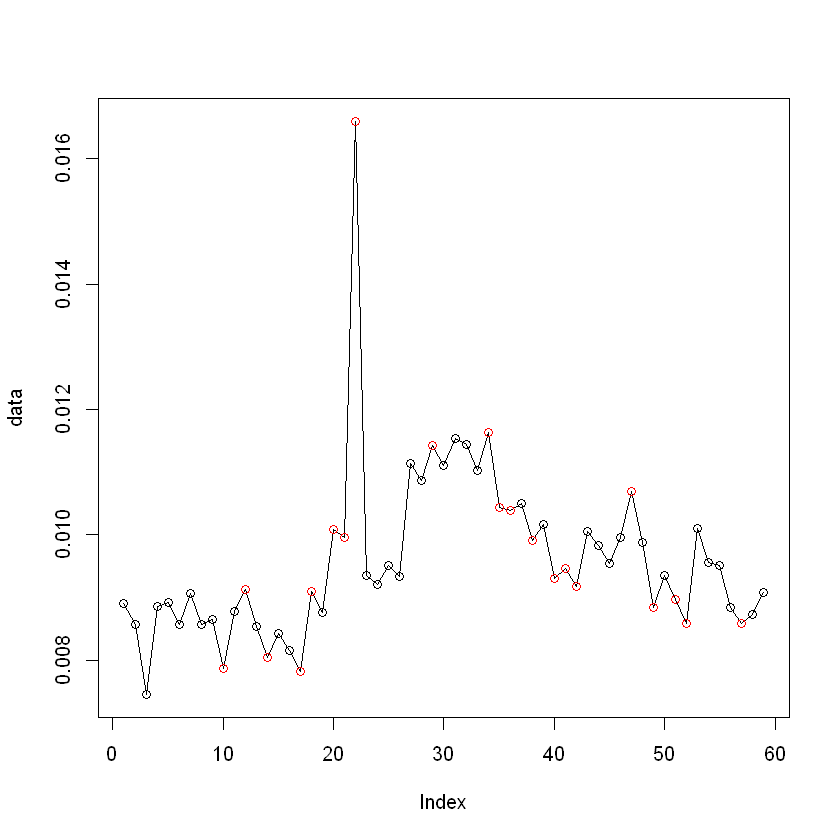

In [166]:
plot(data, col=ifelse(index %in% v,'red','black'), type='o');  lines(fitted(fit),col="blue") 

In [10]:
func3 <- function(data){
    # check stationary
    index = 1:59
    ts = data
    kpss.test(ts)
    
    # fit
    fit <- Arima(ts, c(1,1,7))
    tsdisplay(residuals(fit))
    

    fitted = fitted(fit)
    #error = abs(fitted-ts)
    #mean = rollmean(ts, 7, fill=NA, align='right')
    #std = rollapply(ts, 7, sd, fill=NA, align='right')
    #v = which(error > 1.5*std)
    #plot(fit$x, col=ifelse(index %in% v,'red','black'), type='o');  lines(fitted(fit),col="blue") 
    detect_outlier(data, fit)
    
    f = forecast(fit,7)
    plot(f)
    
}

innovational outliers ("IO"), additive outliers ("AO"), level shifts ("LS"), temporary changes ("TC") and seasonal level shifts ("SLS").

In [ ]:
fit<-arima(d$visitors, c(1,1,7))
detect_outlier(d$visitors, fit)

In [59]:
index = 1:59
ts = d$rate

In [62]:
fit <- Arima(ts, c(1,1,7))

In [70]:
fit <- arima(ts,c(1,1,7))

In [68]:
ts = ts(ts)

In [66]:
locate.outliers.oloop(ts, fit, types=c('AO','LS','TC'))

ERROR: Error in outliers.tstatistics.default(pars = pars, resid = resid, types = types, : argument 'pars' should be of class 'ArimaPars' 
       see '?coefs2poly' in package 'tsoutliers'


In [65]:
detect_outlier <- function(data, fit){
    res <- locate.outliers.oloop(data, fit, types = c("AO", "LS", "TC"))
    res$outliers
    v = as.vector(res$outliers$ind)
    index = 1:59
    plot(data, col=ifelse(index %in% v,'red','black'), type='o');  lines(fitted(fit),col="blue") 
}

ERROR: Error in outliers.tstatistics.default(pars = pars, resid = resid, types = types, : argument 'pars' should be of class 'ArimaPars' 
       see '?coefs2poly' in package 'tsoutliers'


Prophet is a procedure for forecasting time series data. It is based on an additive model where non-linear trends are fit with yearly and weekly seasonality, plus holidays. It works best with daily periodicity data with at least one year of historical data. Prophet is robust to missing data, shifts in the trend, and large outliers.”, I just had to test it out. Could this be what I needed years ago?

## Forecasting

### 1. ARIMA

In [75]:
test

[1] 0.010103427 0.009555147 0.009513023 0.008846065 0.008582548 0.008730028
[7] 0.009080361

In [296]:
##### use the one month to train
data = d$visitors
train = as.numeric(data)[1:52]
test = as.numeric(data)[53:59]

In [369]:
data = d$orders

In [385]:
data = d$rate

In [386]:
train = as.numeric(data)[1:52]
test = as.numeric(data)[53:59]

In [45]:
RMSE <- function(pred, test){
  sqrt(mean((pred - test)^2))
}

In [405]:
data = data*1000

In [444]:
f_arima <- function(data){
    train = as.numeric(data)[1:52]
    test = as.numeric(data)[53:59]
    ts = train
    kpss.test(ts)
    
    # fit
    fit <- Arima(ts, c(4,0,4))
    #fit <- auto.arima(ts)
    #tsdisplay(residuals(fit))
    print(fit$aic)
    
    f = forecast(fit,7)

     #plot(ts,col='red');lines(fit$fitted,col='blue')
    plot(forecast(fit,7))
    
    pred = as.numeric(f$mean)
    
    print(pred)
    return (RMSE(pred, test))
}

[1] 188.5034
[1] 9.386398 9.102888 9.121745 9.191821 9.495702 9.384985 9.302651


[1] 0.5736534

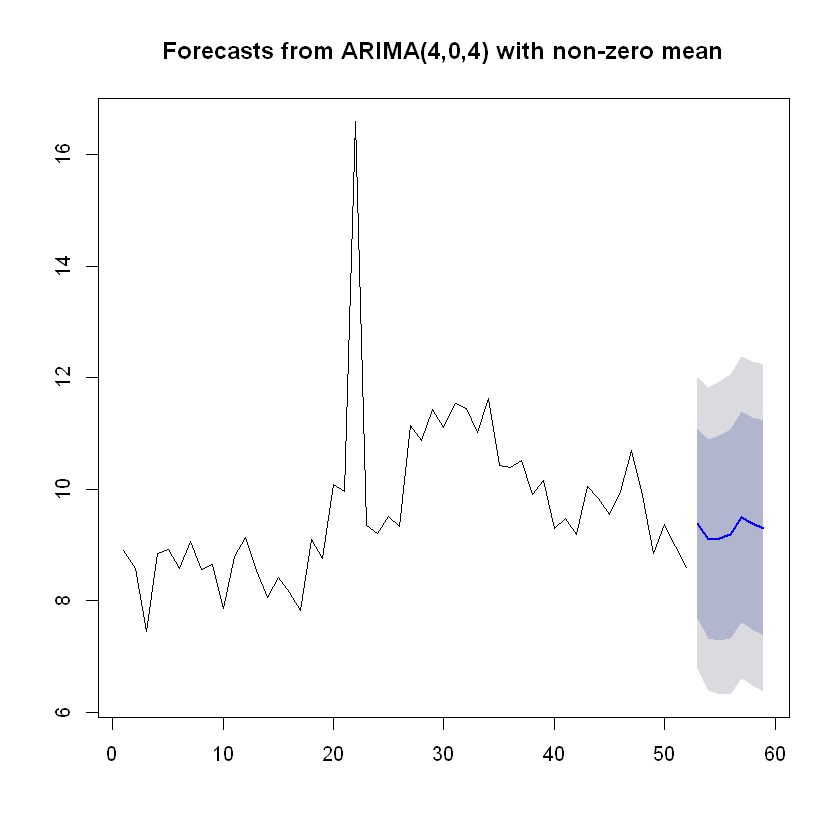

In [445]:
f_arima(data)

Series: train 
ARIMA(7,0,7) with zero mean 

Coefficients:


Warning message in sqrt(diag(x$var.coef)):
"NaNs produced"

          ar1      ar2      ar3      ar4      ar5      ar6      ar7      ma1
      -2.1938  -2.3092  -1.7953  -1.3422  -1.1862  -1.0259  -0.4259  -3.4452
s.e.   0.1442   0.3865   0.5597   0.6075   0.5422   0.3684   0.1394      NaN
         ma2     ma3      ma4     ma5     ma6      ma7
      3.2687  1.1384  -3.1429  0.6109  0.9829  -0.4126
s.e.     NaN     NaN      NaN     NaN     NaN      NaN

sigma^2 estimated as 8.781e+09:  log likelihood=-601.51
AIC=1233.02   AICc=1249.57   BIC=1260.12

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE       MASE     ACF1
Training set 974.6056 77777.11 64299.15 -2.579737 8.704599 0.02037961 0.125833
Time Series:
Start = 46 
End = 52 
Frequency = 1 
[1] -1571559.7  1710996.0 -1129998.5   309930.4    89523.4   -16030.8  -117370.3


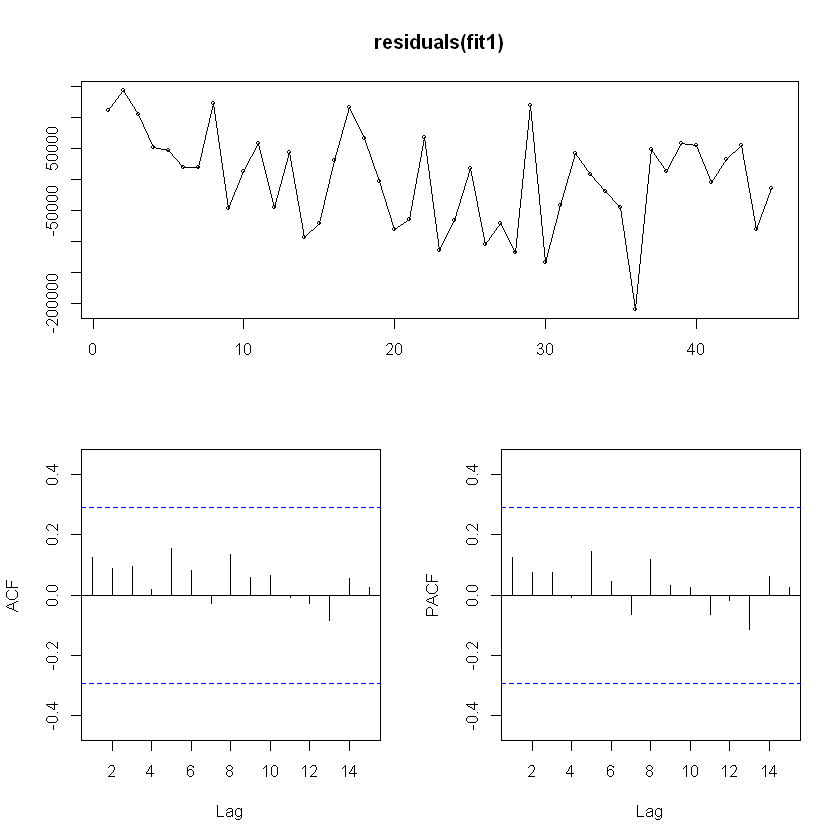

In [257]:
fit1 <- Arima(train, c(7,0,7), include.mean=FALSE)
summary(fit1)
#tsdisplay(residuals(fit1))
f1 = forecast(fit1, 7)
print(f1$mean)

### ets

In [362]:
data = d$visitors
train = as.numeric(data)[1:52]
test = as.numeric(data)[53:59]

ETS(A,N,A) 

Call:
 ets(y = train, model = "ANA") 

  Smoothing parameters:
    alpha = 0.5966 
    gamma = 1e-04 

  Initial states:
    l = 649894.212 
    s = 21450.37 30429.72 -589.5858 9061.723 -56877.56 -36885.77
           33411.1

  sigma:  48979.93

     AIC     AICc      BIC 
1338.696 1344.062 1358.208 

Training set error measures:
                    ME     RMSE      MAE        MPE     MAPE      MASE
Training set -753.3275 44540.06 31950.71 -0.5199084 4.998369 0.5041492
                    ACF1
Training set 0.007063424
Time Series:
Start = c(8, 4) 
End = c(9, 3) 
Frequency = 7 
[1] 635591.2 625937.3 656955.0 647976.2 659934.7 589638.9 569634.0


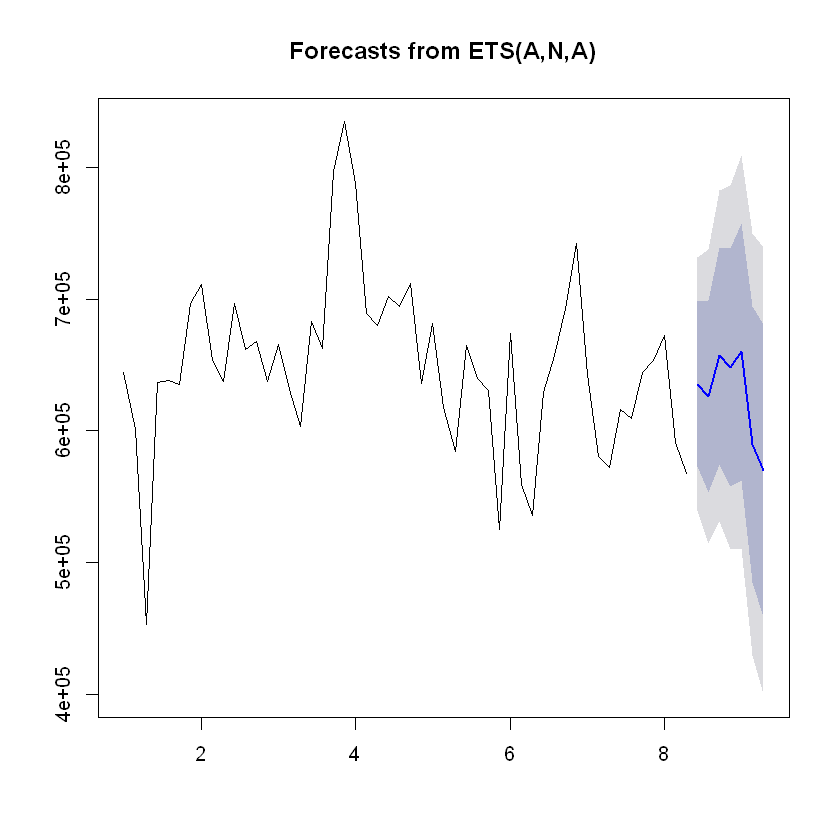

In [363]:
train = ts(train, frequency=7)
fit2 <- ets(train, model='ANA')
summary(fit2)
f2 = forecast(fit2, 7)
plot(f2);
print(f2$mean)

In [287]:
f_ets <- function(data){
    train = as.numeric(data)[1:52]
    test = as.numeric(data)[53:59]
    ts = ts(train, frequency=7)

    
    # fit
    
    fit <- ets(ts, model='AAA')
    #plot(ts,col='red');lines(fit$fitted,col='blue')
    #plot(forecast(fit,7))
    
    
    f = forecast(fit,7)
    plot(f);
    accuracy(f)
    pred = as.numeric(f$mean)
    rmse = RMSE(pred,test)
    print(rmse)
    return (rmse)
}

### holt winters

In [367]:
data = d$visitors
train = as.numeric(data)[1:52]
test = as.numeric(data)[53:59]
train = ts(train, frequency=7)

Time Series:
Start = c(8, 4) 
End = c(9, 3) 
Frequency = 7 
[1] 637097.4 628369.6 634947.1 644033.6 663775.3 599378.8 584142.1


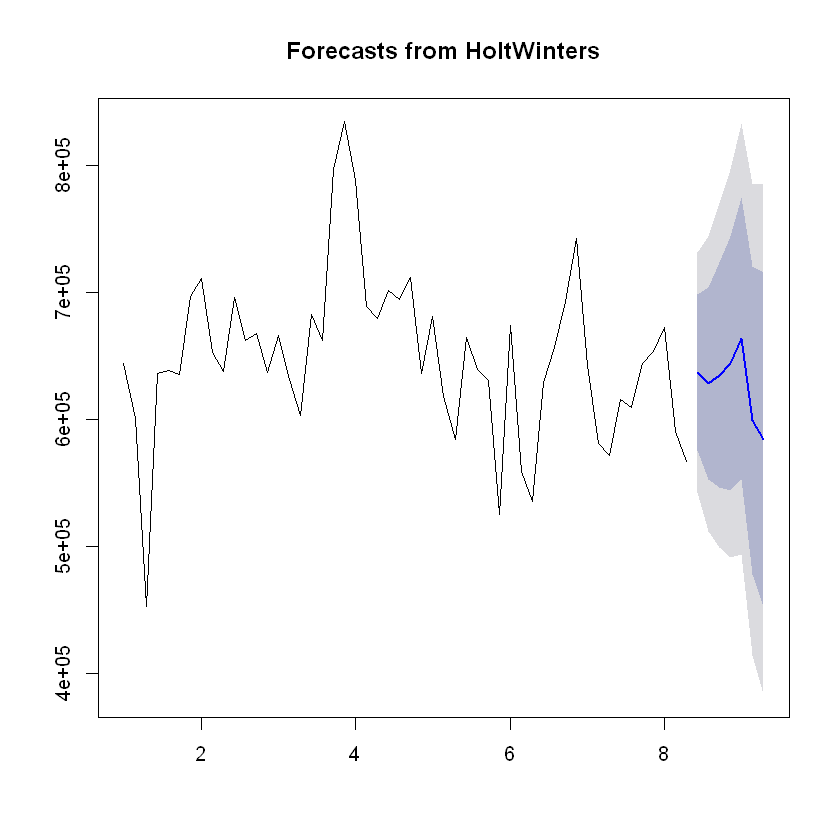

In [368]:
fit3 <- HoltWinters(train, seasonal='additive')
f3<-forecast(fit3,7)
plot(f3)
print(f3$mean)

In [200]:
f_hw <- function(data){
    train = as.numeric(data)[1:52]
    test = as.numeric(data)[53:59]
    ts = ts(train, frequency=7)

    
    # fit
    fit <- HoltWinters(ts, seasonal='additive')
    plot(fit)
    
    f <- forecast(fit,7)
    plot(f)
    accuracy(f)
    print(f$mean)

    pred = as.numeric(f$mean)
    rmse = RMSE(pred,test)
    print(rmse)
    return (rmse)
}

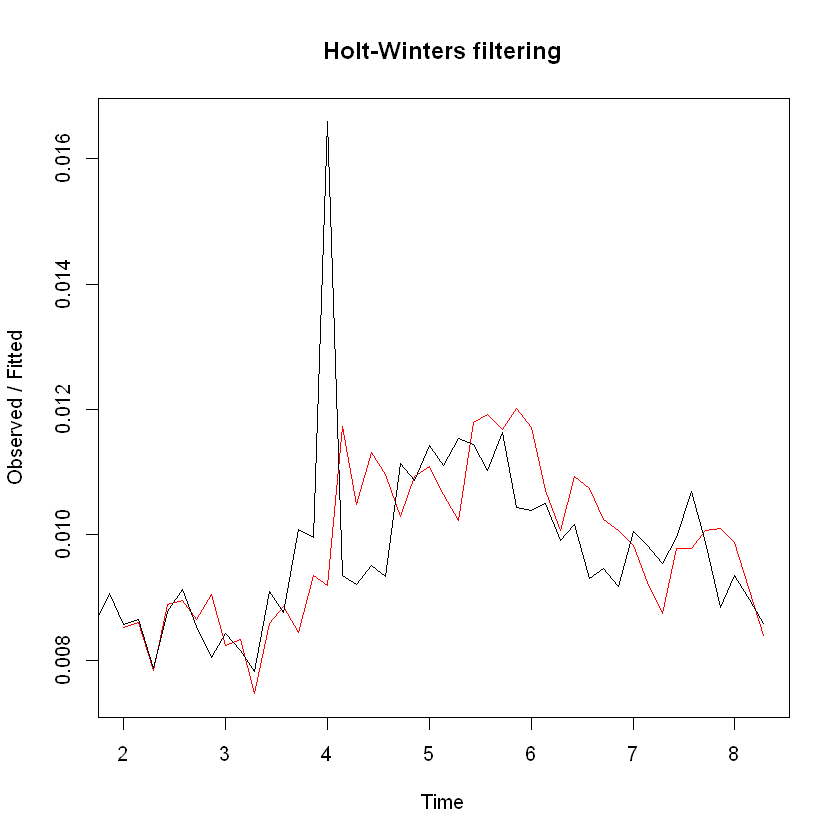

Time Series:
Start = c(8, 4) 
End = c(9, 3) 
Frequency = 7 
[1] 0.009185530 0.009161978 0.009039645 0.009006559 0.009188206 0.008605199
[7] 0.007963942
[1] 0.0006409541


[1] 0.0006409541

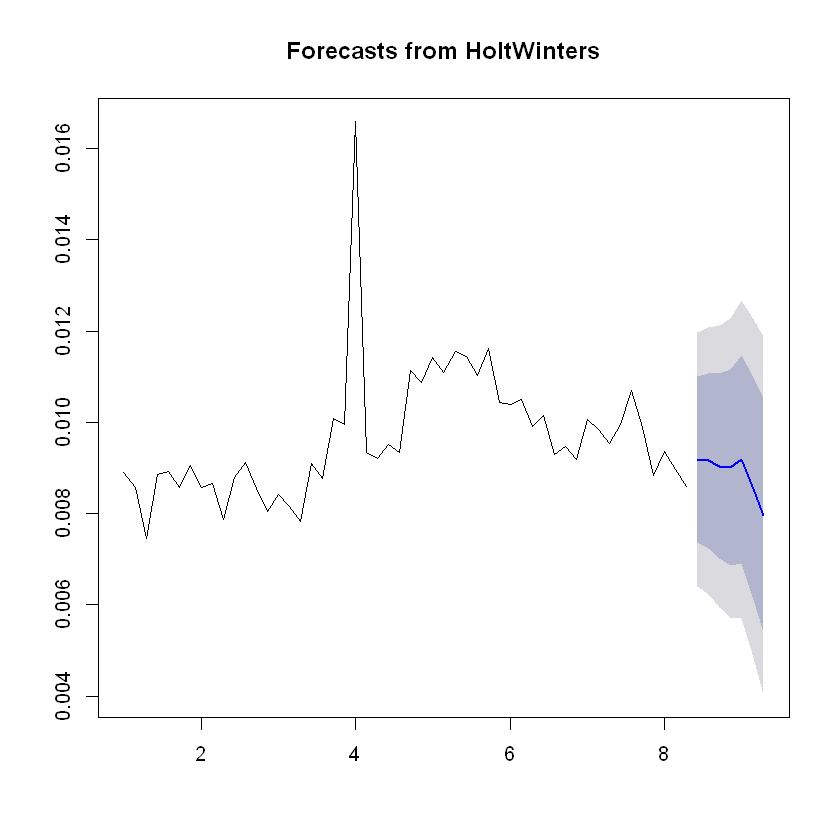

In [201]:
f_hw(data)

#### Holt winters
Both forecasting techniques are uniquely different. The Holt-Winters has fewer parameters, so it's simple, but they're basically smoothing factors so it doesn't tell you much if you know them. ARIMA has more parameters, and some of them have some intuitive meaning, but it still doesn't tell you much.


 The Holt-Winters model is simple and can provide accurate forecasting results as those obtained with more complex techniques. This method is popular, easy to use and generally works well in practical applications. However, it is recommended that the horizon of the predictions made with the Holt-Winters method does not exceed the seasonal cycle of the series, because the predictions with a larger horizon tend to have reduced accuracy. 
 
pros:easy to use, accurate, easy to repeat for several periods
cons: lies behind the trend

#### ARIMA:
uncertainty in the estimation of the parameters is,, ARIMA model has many assumptions that cannot be met. ARIMA methodology is competitive in terms of accuracy

pros: auto correlation 
cons: auto correlation, hard to repeat, require data

### ets:
. In particular, all ETS models are non-stationary, while some ARIMA models are stationary.

If there is a trend and/or seasonality, go for exponential smoothing methods (ETS) because the ETS family explicitly model these components. In case you see autocorrelation in the data, i.e. the past explains the present, go for the ARIMA methodology. Plotting the partial autocorrelation function can help you with this.
Mentally choose a preferred method based on the method described above but run both ARIMA and ETS models. You can choose the best method based on validation methods like out-of-sample validation or information criteria like AIC and BIC. These methods generally try to estimate the real SSE of your method and help you choose the ‘best’ method.